# Double Moon Data

In [2]:
using DataFrames

INFO: Recompiling stale cache file C:\Users\indra\.julia\lib\v0.4\Docile.ji for module Docile.
INFO: Recompiling stale cache file C:\Users\indra\.julia\lib\v0.4\DataFrames.ji for module DataFrames.
INFO: Recompiling stale cache file C:\Users\indra\.julia\lib\v0.4\ArrayViews.ji for module ArrayViews.
INFO: Recompiling stale cache file C:\Users\indra\.julia\lib\v0.4\StatsBase.ji for module StatsBase.
INFO: Recompiling stale cache file C:\Users\indra\.julia\lib\v0.4\StatsFuns.ji for module StatsFuns.
INFO: Recompiling stale cache file C:\Users\indra\.julia\lib\v0.4\DataArrays.ji for module DataArrays.
INFO: Recompiling stale cache file C:\Users\indra\.julia\lib\v0.4\GZip.ji for module GZip.
INFO: Recompiling stale cache file C:\Users\indra\.julia\lib\v0.4\SortingAlgorithms.ji for module SortingAlgorithms.


In [12]:
function dbmoon(N=1000, d=1, r=10, w=6)
    data1 = zeros(N, 2)
    N1 = 10 * N
    w2 = w/2
    r_plus_w2 = r+w2
    r_min_w2 = r-w2
    done = false

    while !done
        tmp = [2*r_plus_w2*(rand(N1,1)-0.5) r_plus_w2*rand(N1,1)]
        magnitude = sqrt(tmp[:,1].*tmp[:,1] + tmp[:,2].*tmp[:,2])
        idxs = find((magnitude.>r_min_w2) & (magnitude.<r_plus_w2))
    
        if length(idxs) >= N
            data1[:] = tmp[idxs[1:N],:]        
            done=true
        end
    end 
    
    data2 = [data1[:,1] + r -data1[:,2]-d]
    
    data = [data1; data2]
    class0 = Array{AbstractString,1}(N)
    class0[:] = "0"
    class1 = Array{AbstractString,1}(N)
    class1[:] = "1"
    classVec = [class0; class1]
    
    df = DataFrame(x=data[:,1], y=data[:,2], class=classVec[:])
    
    return df
end

dbmoon (generic function with 5 methods)

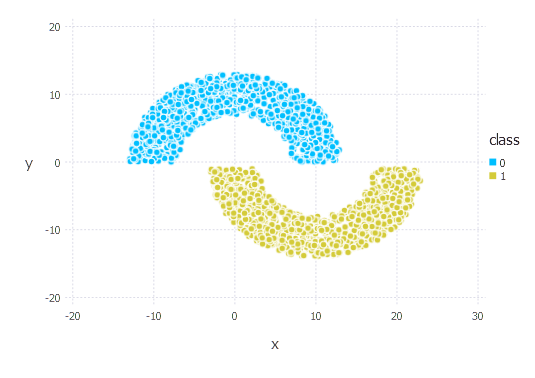

In [13]:
using Gadfly

data = dbmoon()
plot(data, x="x", y="y", color="class")